In [143]:
#----------------------------------------------
# Import Libraries
#----------------------------------------------
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
# Output plots will be loaded after the each cell immediately
%matplotlib inline

# Outline of the Jupyter Notebook
[**Data Cleaning**](#1):Data reading, cleaning, filling NaNs and encoding the data.

[**Exploratory Data Analysis**](#2):Representing the trends in the data science industry and its relation with the indutry. Correlation matrix-plot to visualize the effect of the correlation between features.

[**Feature Selection**](#3): Feature selection- L1 regularization and PCA.

[**Model Implementation**](#4): Implemented 7 different configurations/models for salary prediction.

[**Model Tuning**](#5): Finding optimal combination of different parameters with the help of GreadSearch.

[**Testing and Discussion**](#6): How the model behaves in test and training?


## <a id="1">Step 1: Data Cleaning</a>
- Firstly, the data will be read and will be converted in to the pandas dataframe
- Secondly, Data will be cleaned

In [2]:
# Reading the data with pandas
df=pd.read_csv('Kaggle_Salary.csv',low_memory=False)[1:].set_index('index')
df.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
index,,,,,,,,,,,,,,,,,,,,,
0.0,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1.0,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
2.0,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
3.0,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,-1,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1
4.0,8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,...,-1,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


(1) Columns with no input will be removed first.

(2) Columns title with OTHER_TEXT are removed, as it does not have any significance. 

(3) Column with 'Unnamed: 0' is also removed, due to lack of information.

(4) Salary column is removed from the dataframe. It will act as a target variable. 

In [3]:
# Removing columns in which all columns were empty
df=df.dropna(axis=1,how='all')
# Removing columns which contains OTHER_TEXT string
cols = [c for c in df.columns if c.lower()[-10:] != 'other_text']
df=df[cols]
# Removing Unnamed columns
df=df.drop(columns='Unnamed: 0')
# Removing Q47_Part16 and other similar columns column
df=df.drop(columns=['Q12_Part_1_TEXT','Q12_Part_2_TEXT','Q12_Part_3_TEXT','Q12_Part_4_TEXT',
                    'Q12_Part_5_TEXT','Q47_Part_16','Q32_OTHER'])
#Data preparation for exploratory analysis
df_analysis=df.copy()
# Fetching labels out of the dataframe
Y=df['Q9'].astype(int)
df=df.drop(columns='Q9')

## Data Preparation for model fitting

Handeling NaN values:

(1) NaN values are counted for every columns in the dataset.

(2) If the NaN count for any column is lesser than certain digit then those NaN will be replaced by the mode of the column (of the dataframe). The prime reason of doing this is because, NaN counts in the columns before Q11 is very less than rest of the column of the dataset.

(3) If we look at these questions Q1-Q10, they all are related to a person or those are personal questions, it can not be NaN. While question on or after Q11 columns are multiple choice response (sort of one-hot encoding). They can be replaced with the zero.

Following cells are doing the same things only.

In [ ]:
null_count=dict()
for item in df:
    null=df[str(item)].isna().sum()
    null_count[item]=null
null_count

In [5]:
# Replacing missing values with either mode or zero
# These features are related to the person not with the data science field so replaced with the mode value
for item in df:
    null=df[item].isna().sum()
    if null<df.shape[0]*0.03:
        mode=df[item].mode()
        df[item]=df[item].fillna(mode[0])
        
#Filling up all the NaN values with zero no need for mode as 
df.fillna(0,inplace=True)

In [6]:
#Checking NaN values after filtering these values
null_count=dict()
for item in df:
    null=df[str(item)].isna().sum()
    null_count[item]=null
null_count

{'Time from Start to Finish (seconds)': 0,
 'Q1': 0,
 'Q2': 0,
 'Q3': 0,
 'Q4': 0,
 'Q5': 0,
 'Q6': 0,
 'Q7': 0,
 'Q8': 0,
 'Q10': 0,
 'Q11_Part_1': 0,
 'Q11_Part_2': 0,
 'Q11_Part_3': 0,
 'Q11_Part_4': 0,
 'Q11_Part_5': 0,
 'Q11_Part_6': 0,
 'Q11_Part_7': 0,
 'Q12_MULTIPLE_CHOICE': 0,
 'Q13_Part_1': 0,
 'Q13_Part_2': 0,
 'Q13_Part_3': 0,
 'Q13_Part_4': 0,
 'Q13_Part_5': 0,
 'Q13_Part_6': 0,
 'Q13_Part_7': 0,
 'Q13_Part_8': 0,
 'Q13_Part_9': 0,
 'Q13_Part_10': 0,
 'Q13_Part_11': 0,
 'Q13_Part_12': 0,
 'Q13_Part_13': 0,
 'Q13_Part_14': 0,
 'Q13_Part_15': 0,
 'Q14_Part_1': 0,
 'Q14_Part_2': 0,
 'Q14_Part_3': 0,
 'Q14_Part_4': 0,
 'Q14_Part_5': 0,
 'Q14_Part_6': 0,
 'Q14_Part_7': 0,
 'Q14_Part_8': 0,
 'Q14_Part_9': 0,
 'Q14_Part_10': 0,
 'Q14_Part_11': 0,
 'Q15_Part_1': 0,
 'Q15_Part_2': 0,
 'Q15_Part_3': 0,
 'Q15_Part_4': 0,
 'Q15_Part_5': 0,
 'Q15_Part_6': 0,
 'Q15_Part_7': 0,
 'Q16_Part_1': 0,
 'Q16_Part_2': 0,
 'Q16_Part_3': 0,
 'Q16_Part_4': 0,
 'Q16_Part_5': 0,
 'Q16_Part_6': 0,
 'Q

In [7]:
#Printing first 10 rows of each columns
print(df[:10][:])

      Time from Start to Finish (seconds)      Q1     Q2  \
index                                                      
0.0                                   434    Male  30-34   
1.0                                   718  Female  30-34   
2.0                                   731    Male  22-24   
3.0                                   959    Male  35-39   
4.0                                  1758    Male  18-21   
5.0                                   751    Male  30-34   
6.0                                   823    Male  40-44   
7.0                                  1091    Male  25-29   
8.0                                  1917    Male  25-29   
9.0                                   846  Female  25-29   
10.0                                 1153    Male  25-29   

                             Q3                 Q4  \
index                                                
0.0                   Indonesia  Bachelor’s degree   
1.0    United States of America    Master’s degree   
2.0

**Why we skipped some labelling?**
- Because these column are not catagorical data, they are continuous values.
- All the columns are encoded with **Label Encoding** of scikit learn. Finally, columns after Q11 are almost one-hot encoded, multiple choice response of the user. It can be encded with the same label encoder but the meaning will remain same.

In [8]:
le = preprocessing.LabelEncoder()
skippling_labelling=set()
skippling_labelling={'Time from Start to Finish (seconds)','Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5',
                    'Q34_Part_6','Q35_Part_1','Q35_Part_2','Q35_Part_3','Q35_Part_4','Q35_Part_5','Q35_Part_6'}
classes=dict()
for items in df:
    if items in skippling_labelling:
        pass
    else:
        df[items]=le.fit_transform(df[items].astype(str))
        classes[items]=le.classes_

In [9]:
classes

{'Q1': array(['Female', 'Male', 'Prefer not to say', 'Prefer to self-describe'],
       dtype=object),
 'Q2': array(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49',
        '50-54', '55-59', '60-69', '70-79', '80+'], dtype=object),
 'Q3': array(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus',
        'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia',
        'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France',
        'Germany', 'Greece', 'Hong Kong (S.A.R.)', 'Hungary',
        'I do not wish to disclose my location', 'India', 'Indonesia',
        'Iran, Islamic Republic of...', 'Ireland', 'Israel', 'Italy',
        'Japan', 'Kenya', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands',
        'New Zealand', 'Nigeria', 'Norway', 'Other', 'Pakistan', 'Peru',
        'Philippines', 'Poland', 'Portugal', 'Republic of Korea',
        'Romania', 'Russia', 'Singapore', 'South Africa', 'South Korea',
        'Spain', 'Sweden', 'Switzerland', 'Thailand'

In [10]:
#Final dataframe for model fitting
df['Time from Start to Finish (seconds)']=df['Time from Start to Finish (seconds)'].astype('int64')
df_model=df.copy()
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
index,,,,,,,,,,,,,,,,,,,,,
0.0,434,1,3,22,0,2,11,9,10,1,...,0,0,0,0,0,0,0,0,0,0
1.0,718,0,3,56,3,1,7,7,0,0,...,0,0,0,1,0,0,0,0,0,0
2.0,731,1,1,21,3,8,4,7,0,0,...,0,0,0,1,0,0,1,0,0,0
3.0,959,1,4,8,1,7,11,0,2,1,...,0,0,1,0,0,0,0,1,0,0
4.0,1758,1,0,21,3,7,11,16,0,4,...,0,0,0,0,0,0,1,0,0,0
5.0,751,1,3,19,3,2,17,15,7,3,...,0,0,0,1,0,1,0,0,0,0
6.0,823,1,5,56,3,2,7,16,10,4,...,0,0,0,1,0,0,1,0,0,0
7.0,1091,1,2,15,1,8,19,7,0,3,...,0,0,0,0,0,0,0,0,1,0
8.0,1917,1,2,56,0,8,14,0,1,2,...,0,0,0,1,0,0,0,0,0,0


## <a id="2">Step 2: Exploratory Data Analysis</a>

- Data is taken from the original data-frame. Only columns with 'OTHER_TEXT' were removed. With every visualisation, clear-cut analysis will be mentioned as well.
- In visualisation section, first four graph represents trend in the Data Science industry. Some of the graphs try to make an inference about the salary prediction.
- Secondly, order of feature importance is visualised with the help of corelation plot and decided which original attributes of the data are mostly related to the yearly compensation of the surveyees. 

In [11]:
#Fetching the data-frame
df_analysis

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
index,,,,,,,,,,,,,,,,,,,,,
0.0,434,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,18668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,718,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,2726,...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN
2.0,731,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,682,...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN
3.0,959,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,11957,...,NaN,NaN,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN
4.0,1758,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,2696,...,NaN,NaN,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN
5.0,751,Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,21152,...,NaN,NaN,NaN,Too time-consuming,NaN,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN
6.0,823,Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,132826,...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN
7.0,1091,Male,25-29,France,Doctoral degree,Mathematics or statistics,Student,I am a student,NaN,38246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None of these reasons apply to me,NaN
8.0,1917,Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,35826,...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN


## Visualisation 

All the visualisations are plotted such that they represent the trend in the data and will be helpful in understanding the task of predicting the yearly compensation of the data scientist. 


**(1) Top 10 Highest (mean-compensation) paying countries**
- From the following graph, it can be seen that Switzerland (USD 98,551), United States of America (USD 98,171) and Australia (USD 86,617) are the three major paying countries for the post of Data Science.
- This visualisation is based on one-number (mean) only. **One-number summary meay lead to the false predictions as well.** 
- We need to check the median salaries of these countries as well.
- For annotations on the graph, I have taken a reference from this link:
https://stackoverflow.com/questions/23591254/python-pandas-matplotlib-annotating-labels-above-bar-chart-columns

Text(0.5,1,'Average yearly compensation of 10 highest paying countries')

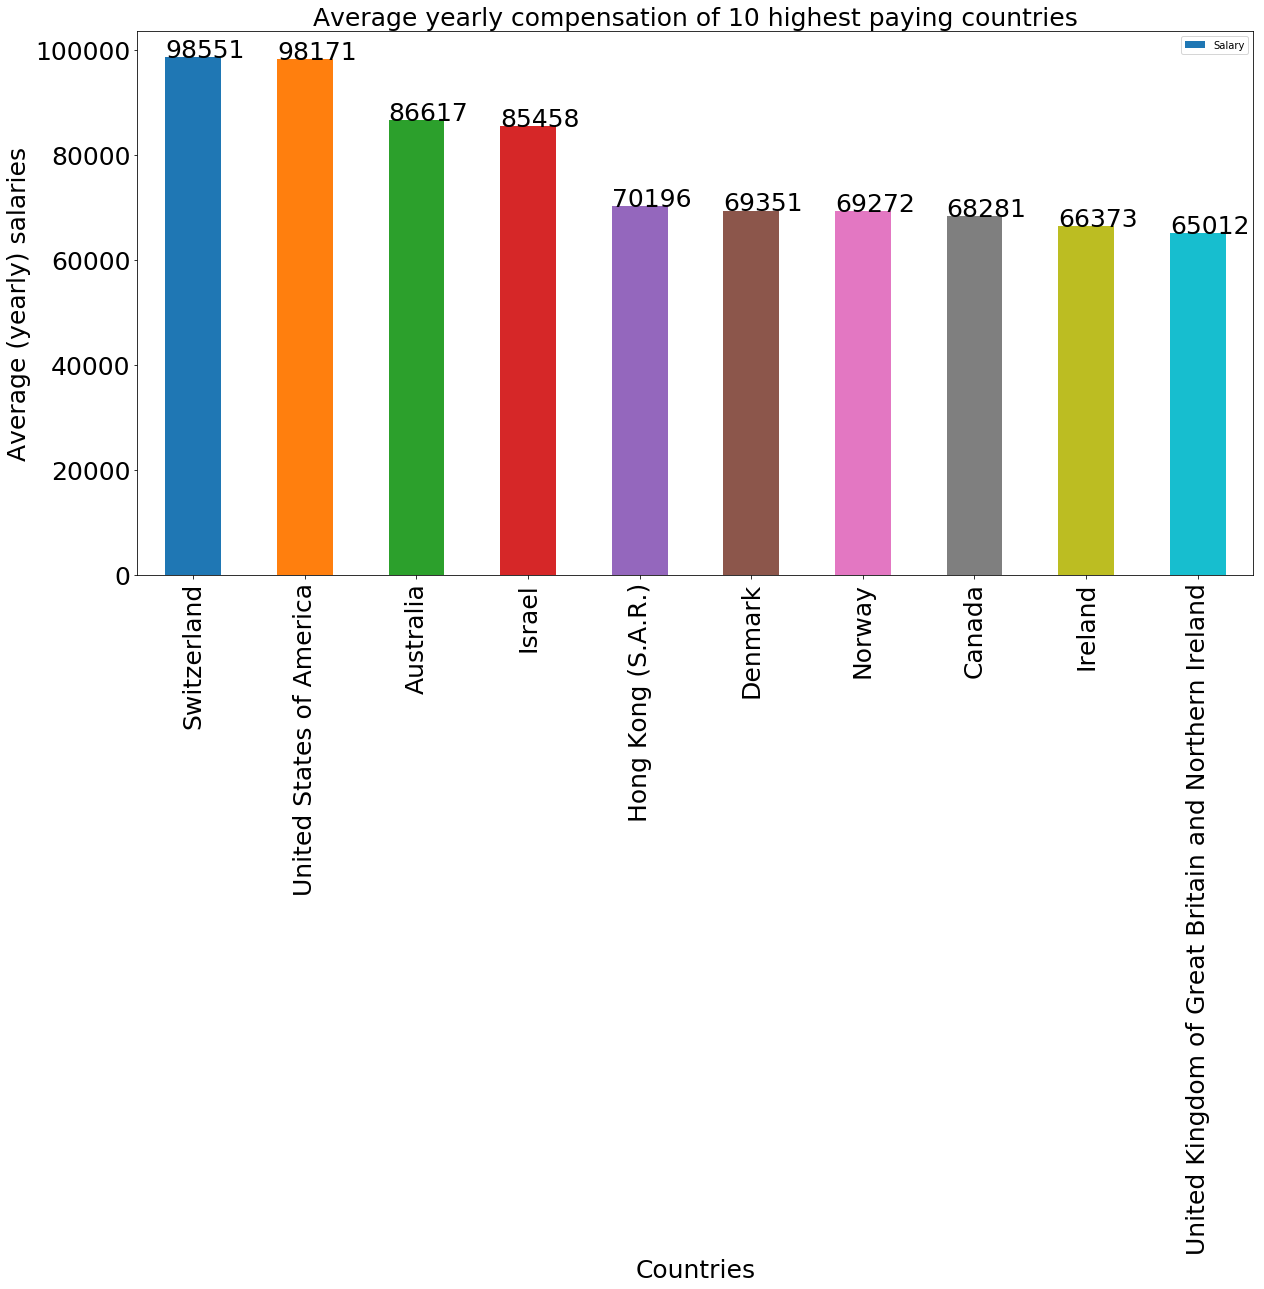

In [12]:
# Analyzing country-wise average salaries
df_analysis.Q9=df_analysis.Q9.astype(int)
grouped = df_analysis.groupby('Q3')
country_salary=grouped['Q9'].mean()

# Plotting 
country=[]
salary=[]
for i,j in country_salary.iteritems():
    country.append(str(i))
    salary.append(int(j))

countrywise=pd.DataFrame(columns=['Country','Salary'])
countrywise.Country=country
countrywise.Salary=salary
countrywise=countrywise.sort_values(by='Salary',ascending=False)
ax=countrywise[:10].plot.bar(x='Country', y='Salary',figsize=(20,10),fontsize=25)
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),fontsize=25)
plt.xlabel('Countries',fontsize=25)
plt.ylabel('Average (yearly) salaries',fontsize=25)
plt.title(r'Average yearly compensation of 10 highest paying countries',fontsize=25)

In [13]:
# Different number of people from different regions of the world
print("No. of Surveyee from USA: %d" % (df_analysis.Q3.value_counts()['United States of America']))
print("No. of Surveyee from Switzerland: %d" % (df_analysis.Q3.value_counts()['Switzerland']))
print("No. of Surveyee from Australia: %d" % (df_analysis.Q3.value_counts()['Australia']))

No. of Surveyee from USA: 3393
No. of Surveyee from Switzerland: 115
No. of Surveyee from Australia: 234


- Instead of Mean, this time Median will be taken into the consideration. One noticable change is in the third place. Australia went at the forth place and Israel came at the third place, when we considered Median salary.

Text(0.5,1,'Yearly compensation (Median value) of 10 highest paying countries')

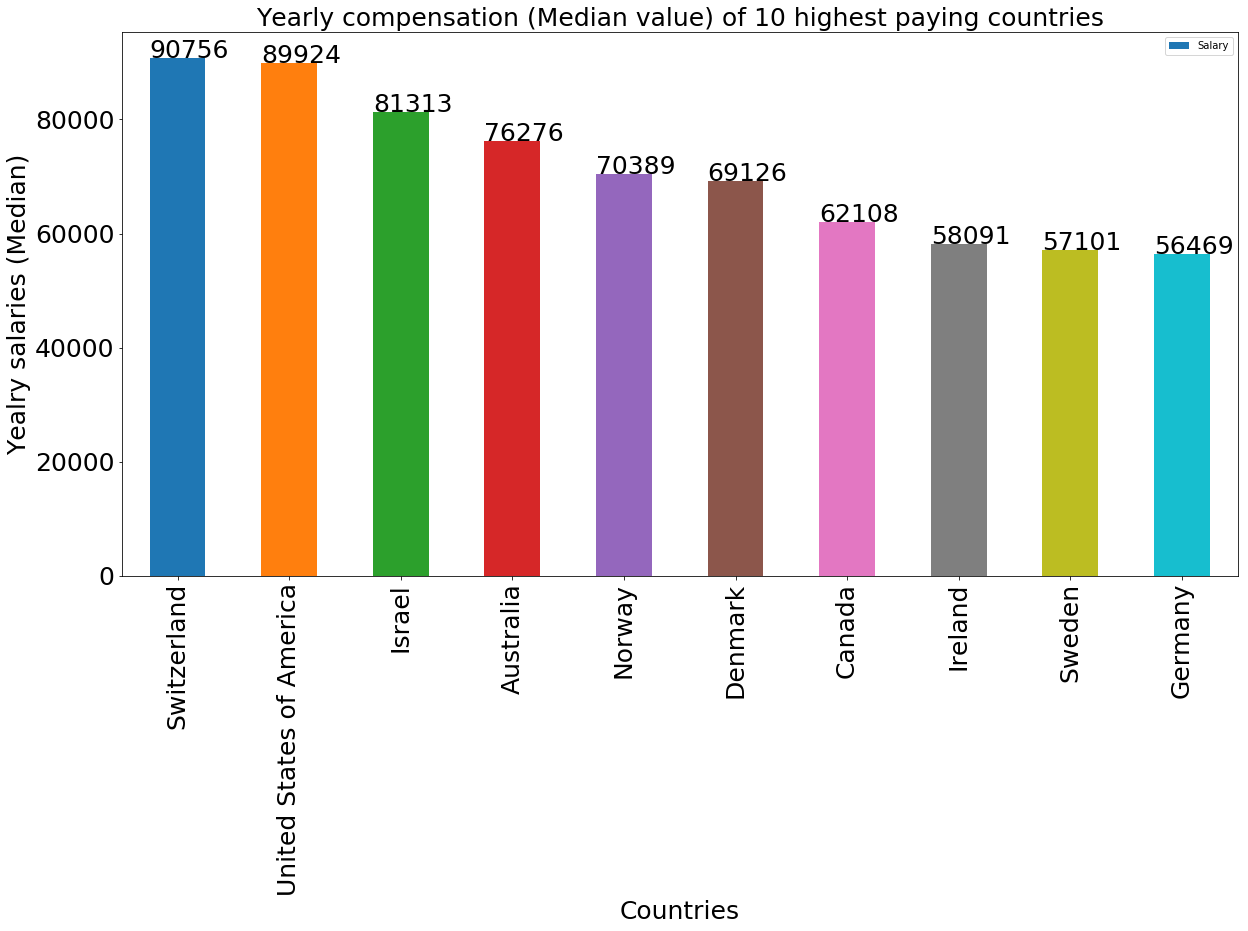

In [14]:
# Analyzing country-wise median salaries
df_analysis.Q9=df_analysis.Q9.astype(int)
grouped = df_analysis.groupby('Q3')
country_salary=grouped['Q9'].median()

# Plotting 
country=[]
salary=[]
for i,j in country_salary.iteritems():
    country.append(str(i))
    salary.append(int(j))

countrywise=pd.DataFrame(columns=['Country','Salary'])
countrywise.Country=country
countrywise.Salary=salary
countrywise=countrywise.sort_values(by='Salary',ascending=False)
ax=countrywise[:10].plot.bar(x='Country', y='Salary',figsize=(20,10),fontsize=25)
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),fontsize=25)
plt.xlabel('Countries',fontsize=25)
plt.ylabel('Yealry salaries (Median)',fontsize=25)
plt.title(r'Yearly compensation (Median value) of 10 highest paying countries',fontsize=25)

**(2) How level of study makes an impact on yearly compensation?**
- In this visualisation, recommendation will be made about the level of education and it will be cheked against the mean yearly compensation of every education level.
- Doctoral degree has the highest yearly compensation.

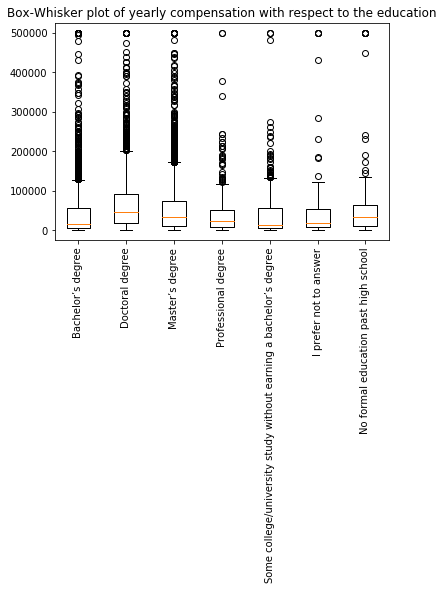

In [15]:
#Box and Whisker Plot
df_analysis.Q9=df_analysis.Q9.astype(int)

ed=dict()

for i,j in enumerate(df_analysis.Q4):
    if j not in ed:
        ed[str(j)]=[df_analysis.Q9[i]]
    else:
        ed[str(j)].append(df_analysis.Q9[i])

data = [ed['Bachelor’s degree'],ed['Doctoral degree'],ed['Master’s degree'],ed['Professional degree'],
        ed['Some college/university study without earning a bachelor’s degree'],ed['I prefer not to answer'],
       ed['No formal education past high school']]

fig7, ax7 = plt.subplots()
ax7.set_title('Box-Whisker plot of yearly compensation with respect to the education')
ax7.boxplot(data,widths = 0.5,labels=['Bachelor’s degree','Doctoral degree','Master’s degree','Professional degree',
                                      'Some college/university study without earning a bachelor’s degree',
                                      'I prefer not to answer','No formal education past high school'])

plt.xticks(rotation=90)
plt.show()

**(3) What specific programming languages are mostly used in Data Science industry?**
- Q17 will be analyzed mainly. Their value counts for each programming will language will be analyzed and will be used to understand the trend in the Data Science industry.
- Inference: Python follwed by R and SQL are the majorly used programming languages in the Data Science industry, all around the world.

Text(0.5,1,'Mostly used programming language in Data Science industry')

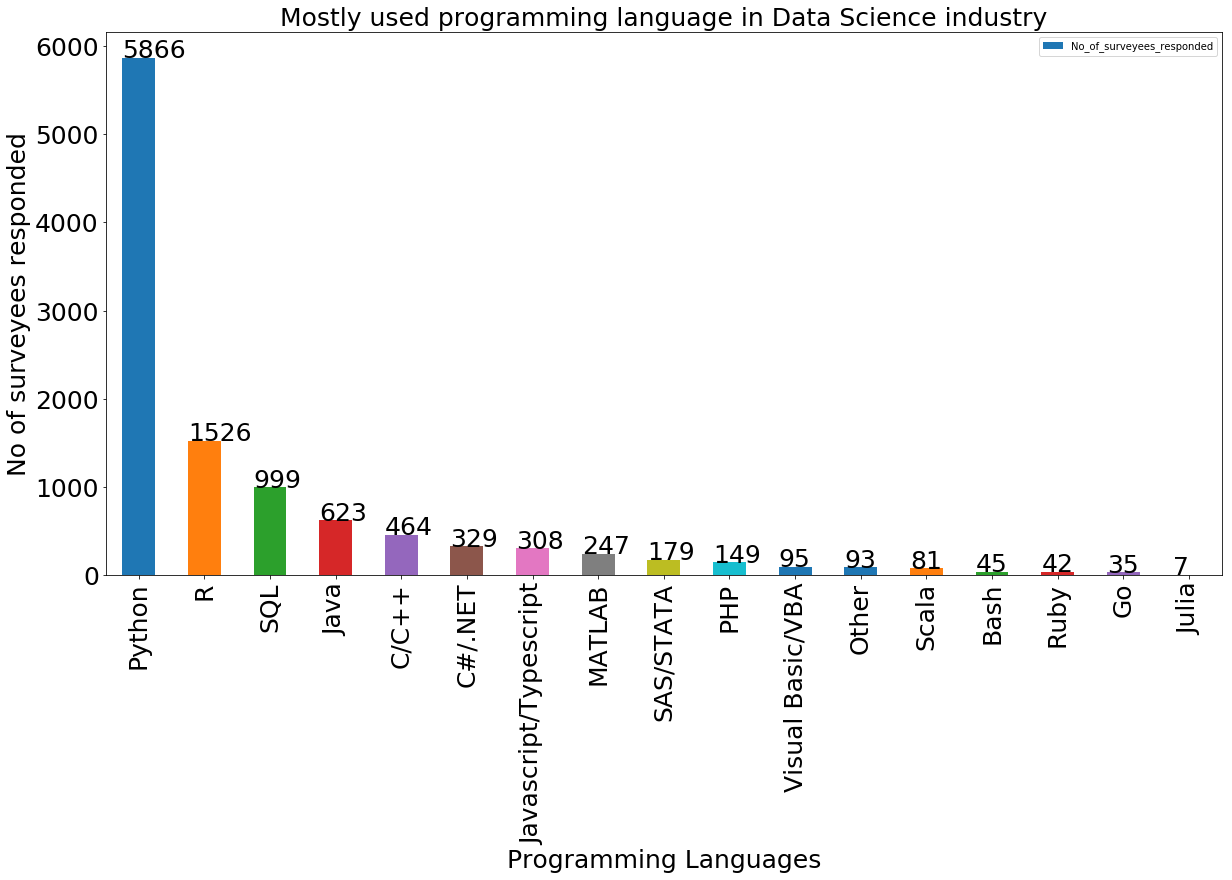

In [16]:
d=df_analysis['Q17'].value_counts().to_dict()

# Plotting 
language=[]
counts=[]
for i,j in d.items():
    language.append(str(i))
    counts.append(int(j))

lang=pd.DataFrame(columns=['Programming_Languages','No_of_surveyees_responded'])
lang.Programming_Languages=language
lang.No_of_surveyees_responded=counts
ax=lang.plot.bar(x='Programming_Languages', y='No_of_surveyees_responded',figsize=(20,10),fontsize=25)
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),fontsize=25)
plt.xlabel('Programming Languages',fontsize=25)
plt.ylabel('No of surveyees responded',fontsize=25)
plt.title(r'Mostly used programming language in Data Science industry',fontsize=25)

## Feature Importance 

In [17]:
df.corr()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
Time from Start to Finish (seconds),1.000000,-0.004463,0.000337,-0.014797,0.007910,0.006171,-0.004346,0.002803,-0.017013,0.020556,...,-0.001337,0.004750,-0.001380,-0.013924,-0.000433,-0.013885,-0.027075,-0.010462,-0.006990,-0.020766
Q1,-0.004463,1.000000,0.069411,-0.069262,-0.011180,-0.053553,0.003394,0.002820,0.068701,0.021187,...,-0.003355,0.000326,0.037764,0.033958,0.005713,0.012585,0.029680,-0.006877,-0.002401,-0.023410
Q2,0.000337,0.069411,1.000000,0.112969,0.079423,0.090619,-0.250534,-0.027135,0.311633,0.086419,...,0.029614,0.047608,-0.003507,0.038894,-0.018656,-0.010542,0.027590,-0.010403,0.084342,0.043445
Q3,-0.014797,-0.069262,0.112969,1.000000,0.010195,0.114892,-0.067063,0.054345,0.013384,0.042902,...,-0.001808,0.026038,-0.017978,0.051073,-0.020354,-0.005881,0.031480,0.003217,0.041181,0.039401
Q4,0.007910,-0.011180,0.079423,0.010195,1.000000,0.005619,-0.067402,0.031083,0.027121,0.025900,...,-0.001039,0.000934,0.008655,-0.007372,-0.005622,0.000701,-0.009661,0.000932,0.008838,0.000429
Q5,0.006171,-0.053553,0.090619,0.114892,0.005619,1.000000,-0.074150,0.030365,0.005066,0.027455,...,0.006549,0.030916,-0.021963,0.053565,0.031527,-0.004365,0.033539,-0.011212,0.027654,0.066085
Q6,-0.004346,0.003394,-0.250534,-0.067063,-0.067402,-0.074150,1.000000,-0.108583,-0.030387,-0.211734,...,0.013573,-0.016521,0.004031,-0.062490,-0.016331,0.003506,-0.043024,0.004345,-0.037624,-0.027363
Q7,0.002803,0.002820,-0.027135,0.054345,0.031083,0.030365,-0.108583,1.000000,-0.005273,0.003864,...,0.015182,-0.002743,-0.017635,0.003829,0.006753,-0.020445,0.002874,0.014201,0.024841,0.022789
Q8,-0.017013,0.068701,0.311633,0.013384,0.027121,0.005066,-0.030387,-0.005273,1.000000,0.022134,...,0.013677,0.006212,0.020533,0.024728,-0.008354,-0.005278,0.018952,-0.004324,0.021744,0.010884
Q10,0.020556,0.021187,0.086419,0.042902,0.025900,0.027455,-0.211734,0.003864,0.022134,1.000000,...,-0.066179,0.038815,0.044098,0.144436,0.033448,0.032549,0.084875,-0.016082,0.006702,0.056154


Plotting of Feature Space correlation matrix.
Reference for understanding the correlation matrix was taken from this link: http://benalexkeen.com/correlation-in-python/.
- This shows how each feature is related to the other. Higher the covariance value, higher the relation between two features. 
- Diagonal of the correlation matrix will always be 1. It is because the corelation of the feature with it self will be obviously very high. For quantitive data, pearson method is used to calculate the corelation.Below corelation matrix of all the features is plotted.

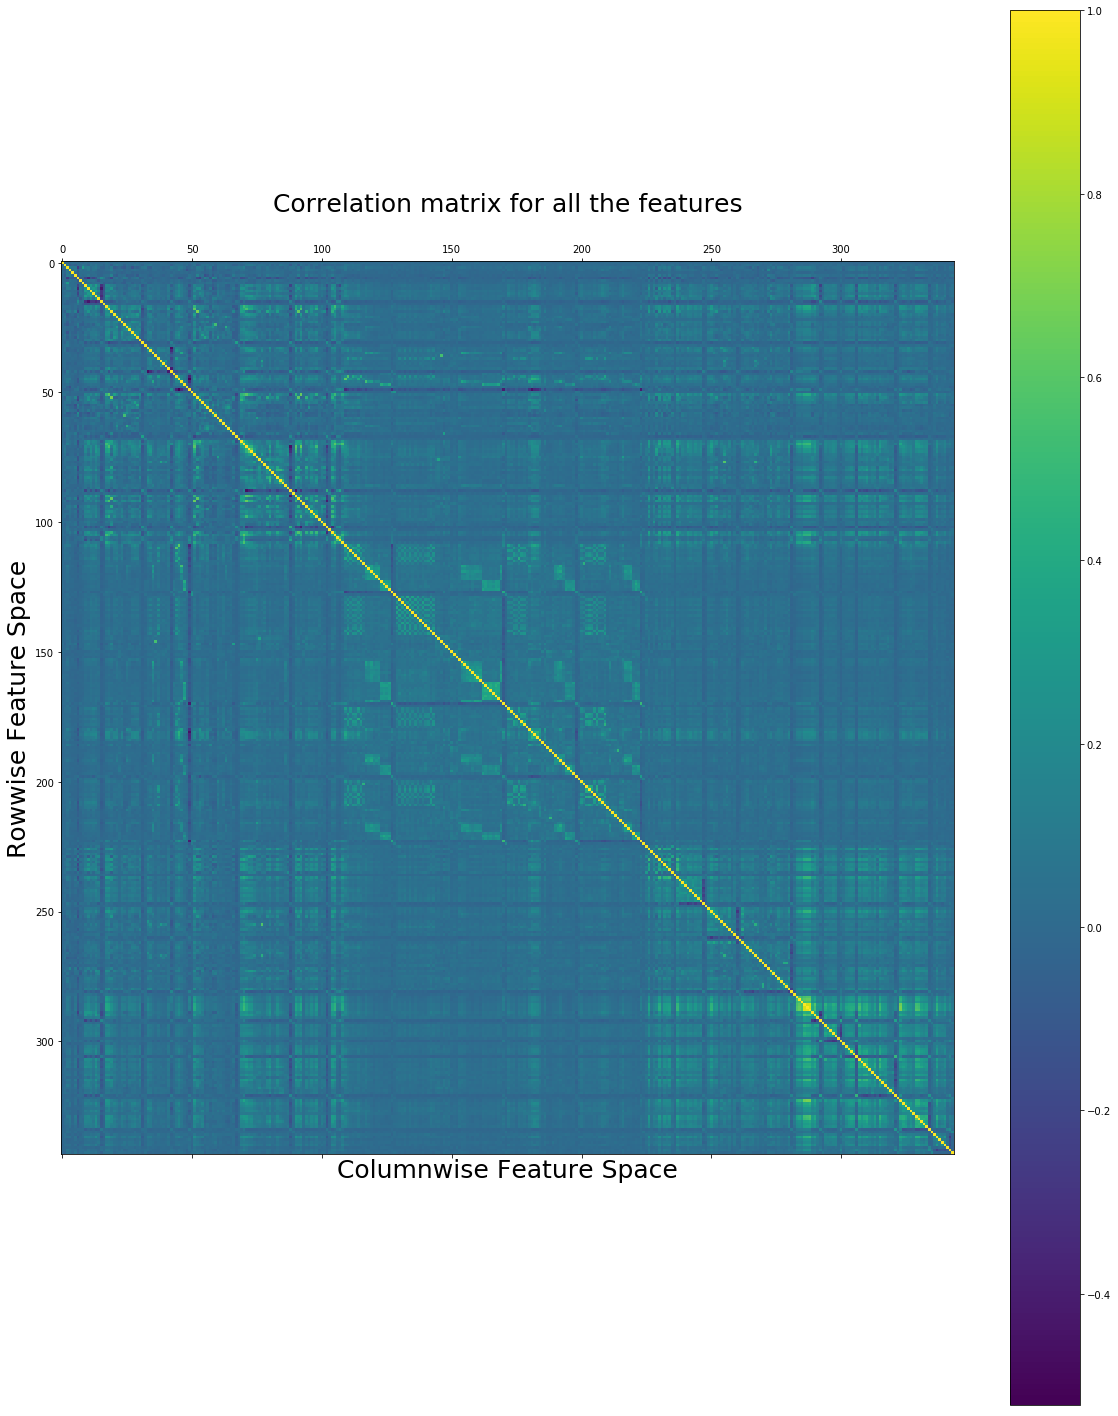

In [18]:
plt.figure(figsize=(20,25))
plt.matshow(df.corr(),fignum=1)
plt.colorbar()
plt.xlabel('Columnwise Feature Space',fontsize=25)
plt.ylabel('Rowwise Feature Space',fontsize=25)
plt.title(r'Correlation matrix for all the features',fontsize=25)
plt.show()

##  What we can infer from the correlation matrix of the Yearly Compensation? 
- It can be seen from the following that Q2 has the highest correlation with the yearly comepnsation. Q2 is the age of the person. It can also be concluded from here that as the age of the person increases in the field, compensation also increases with the experience. 
- Second inference can be claimed that Q3 (Name of the employing country), is the second major area related to the yearly compensation. 

In [19]:
#Combining Features with the output values
cor=pd.concat([df, Y], axis=1)

d=cor.corr().Q9.to_dict()

feat=[]
cor=[]
for i,j in d.items():
    feat.append(str(i))
    cor.append(float(j))

fea=pd.DataFrame(columns=['Feature','Correlation'])
fea.Feature=feat
fea.Correlation=cor

fea.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
344,Q9,1.000000
2,Q2,0.422698
3,Q3,0.267941
45,Q15_Part_2,0.208550
109,Q27_Part_1,0.203035
13,Q11_Part_4,0.192405
9,Q10,0.184257
289,Q42_Part_1,0.184205
208,Q30_Part_9,0.177940
10,Q11_Part_1,0.175795


# <a id='3'>Step 3: Feature Selection</a>

**Manual Feature Removal**

Manual Feature removal has already been implemented in Step 1 (i.e. Data Cleaning). Below are some of the features which have been already removed earlier:

(1) Columns which contains **'OTHER_TEXT'** keyword. 
- Justification: These columns were having -1 at major places. Moreover, there was no clear indication any values of this feature. 

(2) Two columns which have **NULL values** only.
- Justification: Q38_Part_19 and Q38_Part_20 columns were removed as they have null values only.

(3) Column with name Unnamed: 0.
- Justification: This column was having no significant details. 

(4) Columns with name **Q12_Part_1 to Q12_Part_5, Q47_Part_16 and Q32_Text**.
- Justification: These columns were having no significant information as well. 

Finally, after doing this **manual feature selection we have got the data set of 356 features from 395 features**. 

**Feature selection methods with L1 Regularizer method & Principal Component Analysis (PCA)**

In this step, important features will be selected and will be carried forward for future analysis. Firstly, features will be eliminated with the help of L1-Lasso Regularizer and finally PCA will be used to select top k-eigenvectors.

**(1) L1-Lasso Regularizer:**
- Reference used from: https://scikit-learn.org/stable/modules/feature_selection.html
- L1 Regularization (L1-norm of the weights) can be used for the feature selection. 

In [20]:
df_model

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
index,,,,,,,,,,,,,,,,,,,,,
0.0,434,1,3,22,0,2,11,9,10,1,...,0,0,0,0,0,0,0,0,0,0
1.0,718,0,3,56,3,1,7,7,0,0,...,0,0,0,1,0,0,0,0,0,0
2.0,731,1,1,21,3,8,4,7,0,0,...,0,0,0,1,0,0,1,0,0,0
3.0,959,1,4,8,1,7,11,0,2,1,...,0,0,1,0,0,0,0,1,0,0
4.0,1758,1,0,21,3,7,11,16,0,4,...,0,0,0,0,0,0,1,0,0,0
5.0,751,1,3,19,3,2,17,15,7,3,...,0,0,0,1,0,1,0,0,0,0
6.0,823,1,5,56,3,2,7,16,10,4,...,0,0,0,1,0,0,1,0,0,0
7.0,1091,1,2,15,1,8,19,7,0,3,...,0,0,0,0,0,0,0,0,1,0
8.0,1917,1,2,56,0,8,14,0,1,2,...,0,0,0,1,0,0,0,0,0,0


In [21]:
scaler = MinMaxScaler()
scaler.fit(df_model)
df_new=scaler.transform(df_model)

In [22]:
scalery = MinMaxScaler()
scalery.fit(np.array(Y).reshape(Y.shape[0],1))
Y_new=scalery.transform(np.array(Y).reshape(Y.shape[0],1))

C:\Users\Maharshi Trivedi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [122]:
X_tr1,X_te1,Y_tr1,Y_te1=train_test_split(df_new,Y,shuffle=True)
laso_1=linear_model.Lasso(alpha=0.01).fit(X_tr1,Y_tr1)
model=SelectFromModel(laso_1, prefit=True)
X_tr1.shape

(11571, 356)

In [123]:
X_tr1_new=model.transform(X_tr1)
print('Train shape after the feature selection with L1 regularizer')
print(X_tr1_new.shape)
X_te1_new=model.transform(X_te1)
print('Test shape after the feature selection with L1 regularizer')
print(X_te1_new.shape)

Train shape after the feature selection with L1 regularizer
(11571, 356)
Test shape after the feature selection with L1 regularizer
(3858, 356)


In [124]:
laso_2=linear_model.Lasso(alpha=0.01,normalize=True).fit(X_tr1_new,Y_tr1)

In [125]:
print('r2 Score after L1 Regularization')
r2_score(Y_tr1, laso_2.predict(X_tr1_new))

r2 Score after L1 Regularization


0.3729354414955367

In [126]:
print('Mean Square Error after L1 Regularization')
sqrt(mean_squared_error(Y_tr1, laso_2.predict(X_tr1_new)))

Mean Square Error after L1 Regularization


49523.103680436376

**(2) PCA:**
- Principal Component Analysis (PCA) selects the **major/higher n eigenvectors of the covariance matrix of the feature data**. n is the reduced dimension subspace of the data. 
- Result of Lasso Linear Regression is compared with the one after the implementation of PCA. Here, **250 major principal components** were selected and used. 
- No significant change was observed with these two dimensionality reduction techniques. 

In [127]:
pca = PCA(n_components=250)
# pca.fit(X_tr1)
pcadata=pca.fit_transform(df_new)
PCA_X_tr1,PCA_X_te1,PCA_Y_tr1,PCA_Y_te1=train_test_split(pcadata,Y,shuffle=True)

print('Size before the implementation of PCA')
print(X_tr1.shape)
print('Size after the implementation of PCA')
PCA_X_tr1.shape

Size before the implementation of PCA
(11571, 356)
Size after the implementation of PCA


(11571, 250)

In [128]:
laso_PCA=linear_model.Lasso(alpha=0.01).fit(PCA_X_tr1,PCA_Y_tr1)
print('r2 Score after PCA')
r2_score(PCA_Y_tr1, laso_PCA.predict(PCA_X_tr1))

r2 Score after PCA


0.34922747381915364

In [129]:
print('Mean Square Error after L1 Regularization')
sqrt(mean_squared_error(PCA_Y_tr1, laso_PCA.predict(PCA_X_tr1)))

Mean Square Error after L1 Regularization


50090.7884604028

**Why these two methods have been used for feature selection?**
- To reiterate, we first selected L1-Lasso regression method and implemented feature selection. Due to shuffling, it reduces dimension in one direction only. Sometimes, it is not showed up becuase of shuffle option. L1-Regularizer was not so much effective over the data.
- PCA selects major k-principal components, such that variance become maximum for the data points and reconstruction error becomes the least one. PCA confirms the dimensionality reduction, as it selects k-major/principal components in the direction of k-major eigenvectors. 
- Accuracy from both of these methods are more or less similar. However, PCA confirms the dimesionality reduction.
- **None of the methods are used for the following sections.**

# <a id='4'>Step 4: Model Implementation</a>

10-fold cross-velidation is generally used to shift different validation/testing region over certain data. Majorly, siz (6) classifiers will be discussed below, followed by some dicussion on each of them.

In [130]:
df_model

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
index,,,,,,,,,,,,,,,,,,,,,
0.0,434,1,3,22,0,2,11,9,10,1,...,0,0,0,0,0,0,0,0,0,0
1.0,718,0,3,56,3,1,7,7,0,0,...,0,0,0,1,0,0,0,0,0,0
2.0,731,1,1,21,3,8,4,7,0,0,...,0,0,0,1,0,0,1,0,0,0
3.0,959,1,4,8,1,7,11,0,2,1,...,0,0,1,0,0,0,0,1,0,0
4.0,1758,1,0,21,3,7,11,16,0,4,...,0,0,0,0,0,0,1,0,0,0
5.0,751,1,3,19,3,2,17,15,7,3,...,0,0,0,1,0,1,0,0,0,0
6.0,823,1,5,56,3,2,7,16,10,4,...,0,0,0,1,0,0,1,0,0,0
7.0,1091,1,2,15,1,8,19,7,0,3,...,0,0,0,0,0,0,0,0,1,0
8.0,1917,1,2,56,0,8,14,0,1,2,...,0,0,0,1,0,0,0,0,0,0


In [131]:
scaler = MinMaxScaler()
scaler.fit(df_model)
df_new=scaler.transform(df_model)

In [132]:
scalery = MinMaxScaler()
scalery.fit(np.array(Y).reshape(Y.shape[0],1))
Y_new=scalery.transform(np.array(Y).reshape(Y.shape[0],1))

C:\Users\Maharshi Trivedi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


**(1) Linear Regression (L2) with 10-fold cross-validation**

In [135]:
#10 fold cross validation on Linear Regression (L2)
kf = KFold(n_splits = 10, shuffle=True)
rsq=[]
for train_index, test_index in kf.split(df_new):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_tr10reg, X_te10reg = df_new[train_index], df_new[test_index]
    Y_tr10reg, Y_te10reg = Y[train_index], Y[test_index]
    lin_reg=linear_model.Ridge(alpha=.5).fit(X_tr10reg,Y_tr10reg)
    print((r2_score(Y_tr10reg, lin_reg.predict(X_tr10reg))))
    rsq.append((r2_score(Y_tr10reg, lin_reg.predict(X_tr10reg))))
print(np.mean(rsq))

TRAIN: [    0     2     3 ... 15426 15427 15428] TEST: [    1    16    18 ... 15377 15396 15402]
0.36046651390200857
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    4    11    12 ... 15401 15414 15425]
0.3625902322994523
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    7    13    26 ... 15415 15417 15421]
0.36382875117812974
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    9    33    50 ... 15411 15418 15424]
0.36195043251385717
TRAIN: [    0     1     2 ... 15425 15426 15428] TEST: [   42    47    97 ... 15406 15407 15427]
0.36446885856992217
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   55    60    64 ... 15372 15403 15420]
0.3584031826112408
TRAIN: [    0     1     4 ... 15425 15426 15427] TEST: [    2     3    44 ... 15422 15423 15428]
0.36182278892311115
TRAIN: [    1     2     3 ... 15425 15427 15428] TEST: [    0     6    20 ... 15400 15413 15426]
0.3671414332433288
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    5     8

**(2) k-NN with 10-fold cross-validation**

In [136]:
#10 fold cross validation on k-NN Regressor 
kf = KFold(n_splits = 10, shuffle=True)
rsq=[]
for train_index, test_index in kf.split(df_new):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_tr10ne, X_te10ne = df_new[train_index], df_new[test_index]
    Y_tr10ne, Y_te10ne = Y[train_index], Y[test_index]
    neigh = KNeighborsRegressor(n_neighbors=135)
    ne=neigh.fit(X_tr10ne,Y_tr10ne)
    print((r2_score(Y_tr10ne, ne.predict(X_tr10ne))))
    rsq.append((r2_score(Y_tr10ne, ne.predict(X_tr10ne))))
print(np.mean(rsq))

TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   13    31    47 ... 15389 15400 15401]
0.15683418874599286
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   15    19    28 ... 15361 15387 15394]
0.1504224747061097
TRAIN: [    0     1     2 ... 15425 15426 15428] TEST: [   11    37    39 ... 15423 15424 15427]
0.15337894046334144
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    5    14    17 ... 15343 15390 15406]
0.14849952797348076
TRAIN: [    0     2     3 ... 15425 15426 15427] TEST: [    1     8    20 ... 15415 15420 15428]
0.15317502605927813
TRAIN: [    0     1     2 ... 15425 15427 15428] TEST: [   23    24    51 ... 15403 15412 15426]
0.156380583703837
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    9    21    25 ... 15417 15421 15425]
0.15387021926292133
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   27    43    44 ... 15404 15407 15419]
0.15226700020941408
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    3    18

**(3) SVR with 10-fold cross-validation**

In [137]:
#10 fold cross validation on SVM Regressor 
kf = KFold(n_splits = 10, shuffle=True)
rsq=[]
for train_index, test_index in kf.split(df_new):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_tr10svm, X_te10svm = df_new[train_index], df_new[test_index]
    Y_tr10svm, Y_te10svm = Y[train_index], Y[test_index]
    svmr=SVR().fit(X_tr10svm,Y_tr10svm)
    print((r2_score(Y_tr10svm, svmr.predict(X_tr10svm))))
    rsq.append(r2_score(Y_tr10svm, svmr.predict(X_tr10svm)))
print(np.mean(rsq))

TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    8    16    18 ... 15395 15397 15418]
-0.11084254113650815
TRAIN: [    0     1     2 ... 15424 15425 15426] TEST: [    5    12    14 ... 15411 15427 15428]
-0.10977201701883388
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    4    23    24 ... 15413 15414 15424]
-0.11134161592247116
TRAIN: [    0     1     2 ... 15425 15427 15428] TEST: [   26    28    35 ... 15416 15422 15426]
-0.1102053981286577
TRAIN: [    0     1     3 ... 15426 15427 15428] TEST: [    2     7     9 ... 15394 15405 15406]
-0.11036910668033295
TRAIN: [    0     2     3 ... 15426 15427 15428] TEST: [    1    51    54 ... 15362 15392 15393]
-0.10990216075364434
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   10    29    36 ... 15408 15410 15420]


KeyboardInterrupt: 

**(4) Baysian Linear Regression with 10-fold cross-validation**

In [138]:
#10 fold cross validation on Baysian Linear Regression 
kf = KFold(n_splits = 10, shuffle=True)
rsq=[]
for train_index, test_index in kf.split(df_new):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_tr10ba, X_te10ba = df_new[train_index], df_new[test_index]
    Y_tr10ba, Y_te10ba = Y[train_index], Y[test_index]
    bays=linear_model.BayesianRidge().fit(X_tr10ba,Y_tr10ba)
    print(r2_score(Y_tr10ba, bays.predict(X_tr10ba)))
    rsq.append(r2_score(Y_tr10ba, bays.predict(X_tr10ba)))
print(np.mean(rsq))

TRAIN: [    1     2     3 ... 15425 15427 15428] TEST: [    0    29    45 ... 15411 15418 15426]
0.3605405341081853
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    3    12    14 ... 15420 15421 15422]
0.357531379919265
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   23    25    34 ... 15398 15399 15401]
0.3574246402582797
TRAIN: [    0     1     2 ... 15425 15426 15428] TEST: [    6    18    28 ... 15406 15415 15427]
0.3561568327418041
TRAIN: [    0     1     2 ... 15423 15426 15427] TEST: [    7    67    75 ... 15424 15425 15428]
0.3581522747335806
TRAIN: [    0     2     3 ... 15426 15427 15428] TEST: [    1     4     5 ... 15405 15416 15423]
0.3629882574448541
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   20    21    38 ... 15400 15404 15419]
0.3665093911044661
TRAIN: [    0     1     3 ... 15426 15427 15428] TEST: [    2    11    36 ... 15370 15386 15408]
0.3551133703726338
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    9    10    17

**(5) Gradient Boosting with 10-fold cross-validation**

In [139]:
#10 fold cross validation on Gradient Boosting
kf = KFold(n_splits = 10, shuffle=True)
rsq=[]
for train_index, test_index in kf.split(df_new):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_tr10gb, X_te10gb = df_new[train_index], df_new[test_index]
    Y_tr10gb, Y_te10gb = Y[train_index], Y[test_index]
    est=GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1,max_depth=1, loss='ls').fit(X_tr10gb,Y_tr10gb)
    print(r2_score(Y_tr10gb, est.predict(X_tr10gb)))
    rsq.append(r2_score(Y_tr10gb, est.predict(X_tr10gb)))
print(np.mean(rsq))

TRAIN: [    0     1     2 ... 15425 15426 15428] TEST: [   16    42    46 ... 15417 15421 15427]
0.4485134802769094
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    3     7     9 ... 15392 15402 15404]
0.455857361625999
TRAIN: [    0     1     2 ... 15423 15427 15428] TEST: [    5    10    12 ... 15424 15425 15426]
0.45712502293230073
TRAIN: [    0     1     3 ... 15425 15426 15427] TEST: [    2     6    17 ... 15398 15416 15428]
0.44884997445695274
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    8    15    22 ... 15382 15387 15391]
0.45645744709833447
TRAIN: [    0     2     3 ... 15426 15427 15428] TEST: [    1    11    14 ... 15419 15420 15422]
0.4544609801631133
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   26    27    29 ... 15360 15366 15403]
0.45024709134378305
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   25    35    36 ... 15397 15410 15411]
0.4447533976069461
TRAIN: [    1     2     3 ... 15426 15427 15428] TEST: [    0     4  

**(6) Bagging Regressor (Decision Trees) with 10-fold cross-validation**

In [140]:
#10 fold cross validation on Bagging Regressor with Decision Trees
kf = KFold(n_splits = 10, shuffle=True)
rsq=[]
for train_index, test_index in kf.split(df_new):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_tr10bg, X_te10bg = df_new[train_index], df_new[test_index]
    Y_tr10bg, Y_te10bg = Y[train_index], Y[test_index]
    beg=BaggingRegressor(base_estimator=DecisionTreeClassifier(max_depth=25)).fit(X_tr10bg,Y_tr10bg)
    print(r2_score(Y_tr10bg, beg.predict(X_tr10bg)))
    rsq.append(r2_score(Y_tr10bg, beg.predict(X_tr10bg)))
print(np.mean(rsq))

TRAIN: [    0     2     4 ... 15425 15426 15427] TEST: [    1     3    23 ... 15400 15409 15428]
-37.89669736504583
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    8    17    22 ... 15412 15420 15423]
-37.122241327691434
TRAIN: [    0     1     2 ... 15425 15427 15428] TEST: [    4    10    27 ... 15402 15424 15426]
-39.00021822781679
TRAIN: [    1     2     3 ... 15425 15426 15428] TEST: [    0    20    21 ... 15406 15417 15427]
-39.60365952202863
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   12    29    38 ... 15403 15416 15418]


KeyboardInterrupt: 

**(7) Bagging Regressor (Linear Regressor) with 10-fold cross-validation**

In [141]:
#10 fold cross validation on Bagging Regressor with Linear Regressor
kf = KFold(n_splits = 10, shuffle=True)
rsq=[]
for train_index, test_index in kf.split(df_new):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_tr10bg, X_te10bg = df_new[train_index], df_new[test_index]
    Y_tr10bg, Y_te10bg = Y[train_index], Y[test_index]
    beg=BaggingRegressor(base_estimator=LinearRegression(),n_estimators=20).fit(X_tr10bg,Y_tr10bg)
    print(r2_score(Y_tr10bg, beg.predict(X_tr10bg)))
    rsq.append(r2_score(Y_tr10bg, beg.predict(X_tr10bg)))
print(np.mean(rsq))

TRAIN: [    1     2     3 ... 15425 15426 15428] TEST: [    0    27    48 ... 15416 15424 15427]
0.35623857649892676
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    3    52    54 ... 15402 15413 15414]
0.3638387437634456
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    9    11    19 ... 15394 15411 15420]
0.36816463408292066
TRAIN: [    0     1     2 ... 15425 15427 15428] TEST: [    5    23    35 ... 15421 15423 15426]
0.3609919213169718
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   22    34    38 ... 15396 15403 15419]
0.35632643021252386
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [   15    16    20 ... 15393 15408 15417]
0.36232848554270747
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    6     7     8 ... 15395 15397 15409]
0.3610080146335217
TRAIN: [    0     2     3 ... 15426 15427 15428] TEST: [    1    10    14 ... 15359 15401 15415]
0.36030387000150954
TRAIN: [    0     1     2 ... 15426 15427 15428] TEST: [    4    13

### Discussion: Short Description about each of the algorithms

In total, seven different or variation of algorithms were implemented. All the models are implemented with 10 fold cross validation. They are as follows:

**(1) Linear regression:**

- Linear regression was fitted and achieved **~0.36 mean r2**.
- It is very easy to fit and interprete the model from its co-efficients. 
- Over complicated model may easily overfit the data.

**(2) k-NN:**

- Linear regression was fitted and achieved **~0.15 mean r2**.
- No training needed, decisions are taken directly from the euclidean or any other pre-defined distance. 
- Because k-NN takes decisions based on the distance, it is highly sensitive to the data.

**(3) SVR:**

- Support vector regressor was fitted and achieved **~ -0.11 mean r2**.
- Gauranteed Optimality.
- Computation time very high.

**(4) Baysian Linear regression:**

- Baysian Linear regressor was fitted and achieved **~0.35 mean r2**.
- Similar structure like linear regression.

**(5) Gradient Boosting:**

- Gradient Boosting was fitted and achieved **~0.45 mean r2**.
- It is the highest accuracy, achieved so far. 
- Model fits the regression line to the residual of the original model. Its hyper-parameters can also be tuned, but it takes a lot of time.
- Claim can also be made that model has a very high bias, because boosting is improving its performance. 

**(6) Bagging with different Decision trees:**

- Bagging (with Decision trees) was implemented and achieved **~ -38.73 mean r2**.
- It is the lowest accuracy, achieved so far. 
- Bunch of decision trees were trained and predicted some result. Average of those results is assigned to the final output during bagging. 
- Its negative score of r2 also suggests that model has enough variance, as bagging is the technique used to eliminate variance of the model.

**(7) Bagging with different Linear regression models:**

- Bagging (with Linear Regressor) was implemented and achieved **~ 0.36 mean r2**.
- It is the same accuracy, achievd during one linear regressor. 
- It also says that one linear regressor is enough, instead of multiple. 

### Q4.A How does the model accuracy compare across the folds?

- Across the folds, model accuracy remained more or less same, there was not sigificant change observed.

### Q4.B What is average and variance of accuracy for folds?

- Average accuracy of all the methods with 10-fold CV is mentioned below:

**(1) Linear regression:** **~0.36 mean r2**

**(2) k-NN:** **~0.15 mean r2**

**(3) SVR:** **~ -0.11 mean r2**

**(4) Baysian Linear regression:** **~0.35 mean r2**

**(5) Gradient Boosting:** **~0.45 mean r2**

**(6) Bagging with different Decision trees:** **~ -38.73 mean r2**

**(7) Bagging with different Linear regression models:** **~ 0.36 mean r2**

### Q4.C Which model performed best? (Reason based on bias-varience trade off)

- Gradient boosting (~ 42 r2), represents the highest r2 values in all the methods. It means that the data has high bias. It can also be observed that when we increase the number of iterations in gradient boosting, r2 square value also improves. 
- While on the other hand, when bagging is used- it can be clearly seen that model has no impact or have bad impact when we increase variance.

# <a id='5'>Step 5: Model Tuning</a>

Only four methods: Gradient Boosting, k-NN, Linear Regression (L2) and SVR will be carried forward from above. Model tuning for these methods will be done only and at the end, the best/optimal method (one which has the lowest r2) will be carried forward for the next step.

Reference: Code-credit from TA's Assignment2_Tutorial.ipynb file

**(1) Linear Regression:**

In [150]:
reg_gridsearch = linear_model.Ridge()


parameters = {'alpha':[0.01,0.25,0.5]} 

 
acc_scorer_lm = make_scorer(r2_score)


grid_obj_lm = GridSearchCV(reg_gridsearch, parameters, scoring=acc_scorer_lm)
grid_obj_lm = grid_obj_lm.fit(X_tr10reg, Y_tr10reg)

reg_gridsearch = grid_obj_lm.best_estimator_
reg_gridsearch

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [151]:
# Accuracy at Optimal Parameters
reg_gridsearch.fit(X_tr10reg, Y_tr10reg)
reg_gridsearch.score(X_tr10reg, Y_tr10reg)

0.36204402141949144

**(2) Gradient Boosting:**

In [156]:
gb_gridsearch = GradientBoostingRegressor()


parametersgb = {'learning_rate':[0.1,0.3,0.7]} 

 
acc_scorer_gb = make_scorer(r2_score)


grid_obj_gb = GridSearchCV(gb_gridsearch, parametersgb, scoring=acc_scorer_gb)
grid_obj_gb = grid_obj_gb.fit(X_tr10gb,Y_tr10gb)

gb_gridsearch = grid_obj_gb.best_estimator_
gb_gridsearch

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [157]:
# Accuracy at Optimal Parameters
gb_gridsearch.fit(X_tr10gb, Y_tr10gb)
gb_gridsearch.score(X_tr10gb, Y_tr10gb)

0.5324538442607908

**(3) k-NN:**

In [159]:
kn_gridsearch = KNeighborsRegressor()


parameterskn = {'n_neighbors':[135,150,160]} 

 
acc_scorer_kn = make_scorer(r2_score)


grid_obj_kn = GridSearchCV(kn_gridsearch, parameterskn, scoring=acc_scorer_kn)
grid_obj_kn = grid_obj_kn.fit(X_tr10ne,Y_tr10ne)

kn_gridsearch = grid_obj_kn.best_estimator_
kn_gridsearch

KeyboardInterrupt: 

In [ ]:
# Accuracy at Optimal Parameters
kn_gridsearch.fit(X_tr10ne, Y_tr10ne)
kn_gridsearch.score(X_tr10ne, Y_tr10ne)

**(4) SVR:**

In [ ]:
svr_gridsearch = SVR()


parameterssvr = {'C':[0.5,1.0,1.5]} 

 
acc_scorer_svr = make_scorer(r2_score)


grid_obj_svr = GridSearchCV(svr_gridsearch, parameterssvr, scoring=acc_scorer_svr)
grid_obj_svr = grid_obj_svr.fit(X_tr10ne,Y_tr10ne)

svr_gridsearch = grid_obj_svr.best_estimator_
svr_gridsearch

In [ ]:
# Accuracy at Optimal Parameters
svr_gridsearch.fit(X_tr10svm, Y_tr10svm)
svr_gridsearch.score(X_tr10svm, Y_tr10svm)

# <a id='6'>Step 6: Testing and Discussion</a>

From above, it can be seen that Gradient boosting is the optimal algorithm with r2 almost 53. This optimal variation will be implemented over the main data now.

In [160]:
#Optimal Parameter
gb_gridsearch

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [161]:
scaler = MinMaxScaler()
scaler.fit(df_model)
df_new=scaler.transform(df_model)

scalery = MinMaxScaler()
scalery.fit(np.array(Y).reshape(Y.shape[0],1))
Y_new=scalery.transform(np.array(Y).reshape(Y.shape[0],1))

C:\Users\Maharshi Trivedi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [162]:
X_trfin,X_tefin,Y_trfin,Y_tefin=train_test_split(df_new,Y,shuffle=True)

In [163]:
print('Training R2 Score')
print(gb_gridsearch.score(X_trfin, Y_trfin))

Training R2 Score
0.5091877884037961


In [164]:
print('Testing R2 Score')
print(gb_gridsearch.score(X_tefin, Y_tefin))

Testing R2 Score
0.5612770934319875


### How does your model perform on the test vs. train set?

Model perfroms unifromy for training and testing dataset. Moreover, it is giving more score R2 value in Test dataset, which can be considered as a good model.

### How to increase the accuracy?

- The main thing can be done to increase the acccuracy, is to convert the yearly compensation (salary-label) data into the catagorical data.
- This will reduce or squeeze the size of the label data and will impact the regressor to predict more precisely. One regressor predicts the catagory of the salary and then there will be some sub-level regressor which predicts the exact value. 
- This is how, two regressor- one at the high level and another one at the sub-level can be used.

### Is it overfitting/Underfitting? Why?

- It is not overfitting for the obvious reason because test accuracy is higher than the training accuracy, even with these many features. 
- It can be considered as the underfitting problem. However, uncertainty in the data and the non-predictive behaviour of the data makes it limited for exploratory analysis only.